## A1 Continued review of Churn through the lense of Logistic regression

While previous steps have already cleaned the data. I will present this as a linear narrative for others benefit that are hoping to learn the Data Science Workflow. There will be some changes in data preperation to set data up for Logistic regression.

The goal will be to clean, explore, and analyze the data using only statistically significant variables and to demonstrate success or failure with logistic regression to identify predictores of churn.Summary report and confusion matrix to validate the output. 



## B1 Summary of Assumptions
 - Variable are independent of eachother
 - Data represents unrepeated individual inputs
 - the sample or population size is large enough for statistical significance 10 observations per variable ie 3 variable      = minimum of 30 observations
 - Variables used can be converted to binary as in Yes, No is now 1,0
 


## B2 TOOL SELECTION BENEFIT
- python
- jupyter notebooks

The analysis will be conducted in Jupyter Notebooks using Python. Jupyter Notebooks is a graphical ease of use to present data analyis while also being allowed to code ad-hoc for any changes. 

While Python and R both have the required statistical packages, Python has additional packages if I wanted to use this analyis for production. Because this is to review customer churn, my assumption is this will be an ongoing effort and not a one time analysis. I have chosen python for production flexability. 

I will be exploring and using 

import sys, os  for locating files and directories

The following I will use to place data into data frames or arrays and visualize. 
- import pandas as pd
- import numpy as np
- import seaborn as sns

I will use these libraries for statistical analysis. 
- import scipy.stats as stats
- import math
- import statsmodels.api as sm

I will use these libraries for additional visualizations. 
- import matplotlib as mpl
- import matplotlib.pyplot as plt
- from matplotlib import rcParams


The following packages I will use for preproccessing, scaling, imputing and principle component analysis. 
- from sklearn import preprocessing
- from sklearn.preprocessing import scale
- from sklearn.impute import SimpleImputer
- from sklearn.decomposition import PCA
- from sklearn.preprocessing import StandardScaler

## B3 WHY LOGISTIC REGRESSION IS APPROPRIATE

Churn has an out put of Yes or No, this is binary. Because Logistic Regression is used when a dependent 
variable is binary it is a good use case for determining Churn. 

## C1 DATA GOALS
First goal is to remove any blanks, duplicates, or spaces. The data will also have Nans removed INF converted into INT. Item fields will be giving Business Acumen Names from data dictionary. Any records that still have missing values will be imputed. 

Next goal will be to create groups of fields will be created for potential exploration and analysis. Groups will be based on data type or domain understanding. 

Because of the number of categorial values get_dummies will be use over one hot encoding. This will allow for the the categorial values to be assessed numerically.

The final goal will be to take the target variable and review relationships with predictors. 

## C2 SUMMARY STATISTICS
Unistats review of each variable will include mean, median, mode, min, max, range, standard devaiation, range.
Categorical variables will include counts of each time a category is observed. 



#### LIBRARIES
Common libraries used for working with data, stats, visualization and analysis. 
Before beginning Summary statistics all libraries are loaded for easy of management. This may not account for all libraries used for further exploration or experiments.

In [26]:
#LOAD LIBRARIES
# system
import sys, os

# Data
import pandas as pd
import numpy as np
import seaborn as sns


# stats
import scipy.stats as stats
import math
import statsmodels.api as sm

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams

# analysis
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import sys
from time import time
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split, StratifiedShuffleSplit
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn import svm

# VISUALIZATION
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

#  Creating a reusable basic EDA function 
this function is callable for quick reference throughout project to review the shape, columns and basic stats description. 
this is not used as part of the workflow but a tool to review datasets, and subsets quickly and then removed. 

In [27]:
#### basic eda function for quick review
def basic_eda():
    print("HOW MANY RECORDS, HOW MANY COLUMNS")
    print(file.shape),
    print("ALL COLUMNS")
    print(file.columns),
    print("BASIC STATISTICS")
    for col in file:
        print("#############")
        print(file[col].describe())
    
        
    

### Load the data set Churn_clean for prep and analysis

In [28]:
# LOAD DATA
file = pd.read_csv('C://Users//matth//Desktop//DATA//churn_clean.csv')

review first 10 rows of data to understand the attributes

In [29]:
#Observe raw data
file.head(10)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
5,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,97598fd95658c80500546bc1dd312994,Fort Valley,GA,Peach,31030,32.57032,-83.89040,...,185.007692,1039.357983,3,3,3,2,4,3,3,3
6,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,87d1c4223e49156020564c01a88973b9,Pioneer,TN,Scott,37847,36.43420,-84.27892,...,200.118516,1907.242972,6,5,6,4,1,5,5,5
7,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,fce3f21888317907de42e298d718ccce,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,...,114.950905,979.612708,2,2,2,5,2,3,4,5
8,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,6c7043ced703b84de29766af3d53c976,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,...,117.468591,1312.874964,5,4,4,3,4,3,4,4
9,10,I676080,86f17e4d-2c24-4b70-a6ec-dddf0609dbaa,6ffe183271258a039e122ced8750b2a0,Cincinnati,OH,Hamilton,45237,39.19296,-84.45230,...,162.482694,508.763791,2,2,2,2,5,2,3,3


Remove fields that are unneeded or appear to have no business value

In [30]:
# Drop unneeded fields
file = file.drop(['UID','TimeZone','State','Job','CaseOrder', 'Customer_id', 
                  'Interaction', 'Lat', 'Lng','County', 'Zip', 'Area', 'City', 'Population', 'Email', 'Port_modem',
                 'InternetService', 'Phone', ], axis = 1)


In [31]:
file.columns

Index(['Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure', 'Techie',
       'Contract', 'Tablet', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [32]:
file['TechSupport']

0        No
1        No
2        No
3        No
4       Yes
       ... 
9995     No
9996     No
9997     No
9998    Yes
9999     No
Name: TechSupport, Length: 10000, dtype: object

Run a basic Eda over new dataset

In [33]:
basic_eda()

HOW MANY RECORDS, HOW MANY COLUMNS
(10000, 32)
ALL COLUMNS
Index(['Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure', 'Techie',
       'Contract', 'Tablet', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')
BASIC STATISTICS
#############
count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64
#############
count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64
##########

Review just Churn

In [34]:
#Show only unique values for Churn
print(file['Churn'].unique())

['No' 'Yes']


In [35]:
#Describe stats for Churn
print(file['Churn'].describe())

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object


### Discussion of Summary Statistics
After removing Columns that provided no specific analytics value('UID','TimeZone','input_date','State','Job','CaseOrder', 'Customer_id', 
                  'Interaction', 'Lat', 'Lng','County', 'Zip', 'Area', 'City', 'Population', 'Email', 'Port_modem',
                 'InternetService', 'Phone')
There were 32 Columns remaining. and 10000 records. 

The target variable Churn has a binary output of Yes and No with 7350 records indicating No for Churn and 2650 records indicating Yes for churn
Remaining predictors are Numberic and object fields. Item1 - Item8 will need meta data to replace headers for meaningful output. Focus will be in the binary fields 
as predictors. 

I will be running further univariate and bivariate statistics to narrow down the following predictors. 
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure', 'Techie',
       'Contract', 'Tablet', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year'
After reviewing boxplots, barcharts and summary report from the initial model I will have the visiualization, P and R scores to 
make decisions about removal of less relevent predictors to increase the models fit. 


# # C3 STEPS TO PREPARE THE DATA
Basic data cleaning:(removing blanks, empty spaces, dropping duplicate records and converting dtype INF to INT)
Basic EDA over basic data clean.

- Item fields will be renamed to reflect business acumen in Metadata. 
- Item fields will be grouped and summed in case of ratio relevancy is needed.
- Numeric group will be standardized using std.
- Subsets created based on numeric or object data type and again on domain knowledge. 
- Setup Target(MonthlyCharge) to be first field and rest to be predictor fields for ease of navigation. 
- Place predictor fields into a dataframe.
- Dummy Variables will then be created over categorical data. 

### Basic data cleaning:(removing blanks, empty spaces, dropping duplicate records and converting dtype INF to INT)

In [36]:
## Assumption is the data is already cleaned per course 207. Validating there are no blank records
for col in file:
    blanks = []
    if file.columns.isna().any()== True:
        blanks = col
print(blanks)

[]


Remove blank spaces and Drop duplicates

In [37]:
# For effiecency will still make assumption that data is cleaned but perform removal of blank spaces and drop duplicates
# Remove blank spaces
file = file.replace(" ", "")

# Drop Duplicates
file = file.drop_duplicates()

Ensure numeric data is in the correct format

In [38]:
#Convert INF to INT
# Convert duration to integer
for col in file:
    if file[col].dtype == 'float':
        file[col] = file[col].astype(int)

#### Basic EDA over basic data clean.

In [39]:
# re running basic eda
basic_eda()

HOW MANY RECORDS, HOW MANY COLUMNS
(10000, 32)
ALL COLUMNS
Index(['Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure', 'Techie',
       'Contract', 'Tablet', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')
BASIC STATISTICS
#############
count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64
#############
count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64
##########

In [40]:
# rename item fields
col = file.columns.values
item_desc= (['Timely_response', 'Timely_fixes', 'Timely_replacements', 
            'Reliability', 'Options','Respectful_response', 
            'Courteous_exchange', 'Evidence_of_active_listening'])
col[-8:]= item_desc
file.columns = col

#### Subsets created based on numeric or object data type and again on domain knowledge. 
 

In [41]:
file_null = file.isnull().any()
print(file_null)

Children                        False
Age                             False
Income                          False
Marital                         False
Gender                          False
Churn                           False
Outage_sec_perweek              False
Contacts                        False
Yearly_equip_failure            False
Techie                          False
Contract                        False
Tablet                          False
Multiple                        False
OnlineSecurity                  False
OnlineBackup                    False
DeviceProtection                False
TechSupport                     False
StreamingTV                     False
StreamingMovies                 False
PaperlessBilling                False
PaymentMethod                   False
Tenure                          False
MonthlyCharge                   False
Bandwidth_GB_Year               False
Timely_response                 False
Timely_fixes                    False
Timely_repla

In [42]:
# Categorical values group creation
obj = []
num = []
for col in file:
    if file[col].dtype == 'object':
        obj.append(col) 
    else:
        num.append(col)
print("Object list \n",obj)
print('\n')
print("Numeric list \n",num)




Object list 
 ['Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Tablet', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']


Numeric list 
 ['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_response', 'Timely_fixes', 'Timely_replacements', 'Reliability', 'Options', 'Respectful_response', 'Courteous_exchange', 'Evidence_of_active_listening']


In [43]:
file['Intercept'] = 1
file['churn_dum'] = [1 if v == 'Yes' else 0 for v in file['Churn']]
file['Techie'] = [1 if v == 'Yes' else 0 for v in file['Techie']]
file['Tablet'] = [1 if v == 'Yes' else 0 for v in file['Tablet']]
file['Multiple'] = [1 if v == 'Yes' else 0 for v in file['Multiple']]
file['DeviceProtection'] = [1 if v == 'Yes' else 0 for v in file['DeviceProtection']]
file['TechSupport'] = [1 if v == 'Yes' else 0 for v in file['TechSupport']]
file['OnlineSecurity'] = [1 if v == 'Yes' else 0 for v in file['OnlineSecurity']]
file['OnlineBackup'] = [1 if v == 'Yes' else 0 for v in file['OnlineBackup']]
file['DeviceProtection'] = [1 if v == 'Yes' else 0 for v in file['DeviceProtection']]
file['TechSupport'] = [1 if v == 'Yes' else 0 for v in file['TechSupport']]
file['StreamingTV'] = [1 if v == 'Yes' else 0 for v in file['StreamingTV']]
file['StreamingMovies'] = [1 if v == 'Yes' else 0 for v in file['StreamingMovies']]
file['PaperlessBilling'] = [1 if v == 'Yes' else 0 for v in file['PaperlessBilling']]   

In [44]:
type(file)

pandas.core.frame.DataFrame

# C4 VISUALIZATIONS
The submission accurately generates both univariate and bivariate visualizations of the distributions of variables in the cleaned data set. The bivariate visualizations include the target variable. 

Using a loop create boxplots over file dataframe.

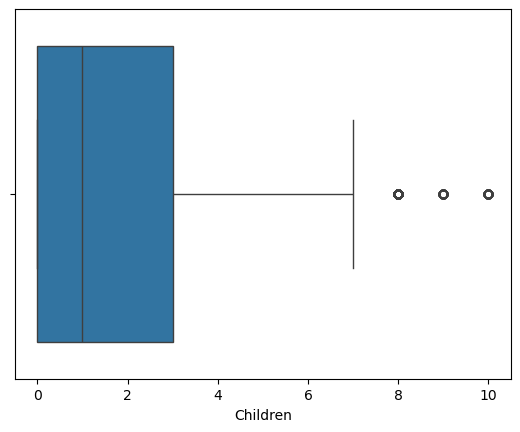

count    10000.00
mean         2.09
std          2.15
min          0.00
25%          0.00
50%          1.00
75%          3.00
max         10.00
Name: Children, dtype: float64


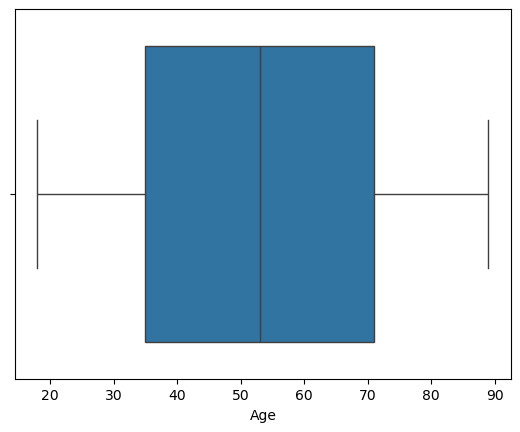

count    10000.00
mean        53.08
std         20.70
min         18.00
25%         35.00
50%         53.00
75%         71.00
max         89.00
Name: Age, dtype: float64


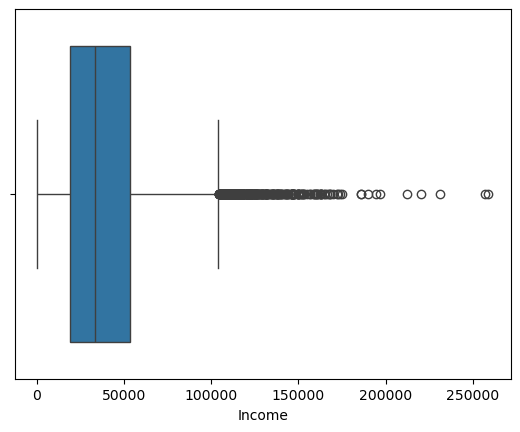

count     10000.00
mean      39806.43
std       28199.93
min         348.00
25%       19224.00
50%       33170.00
75%       53245.50
max      258900.00
Name: Income, dtype: float64


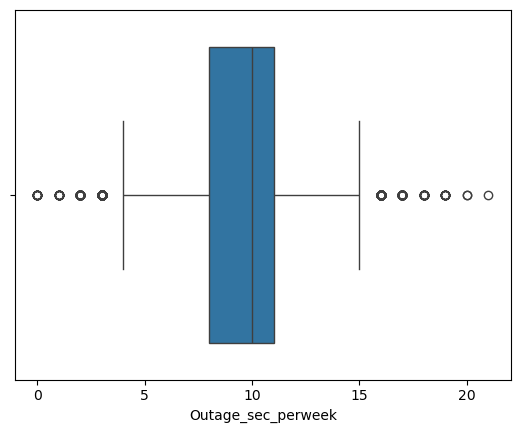

count    10000.00
mean         9.50
std          2.99
min          0.00
25%          8.00
50%         10.00
75%         11.00
max         21.00
Name: Outage_sec_perweek, dtype: float64


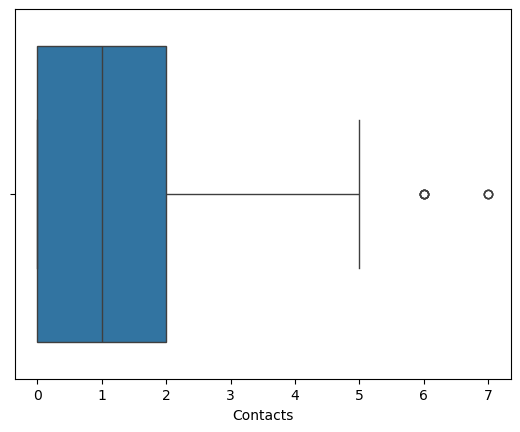

count    10000.00
mean         0.99
std          0.99
min          0.00
25%          0.00
50%          1.00
75%          2.00
max          7.00
Name: Contacts, dtype: float64


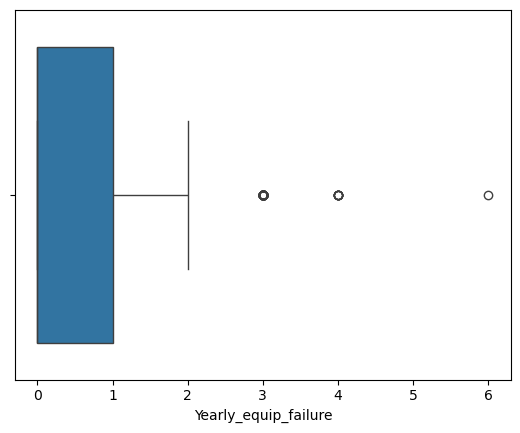

count    10000.00
mean         0.40
std          0.64
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          6.00
Name: Yearly_equip_failure, dtype: float64


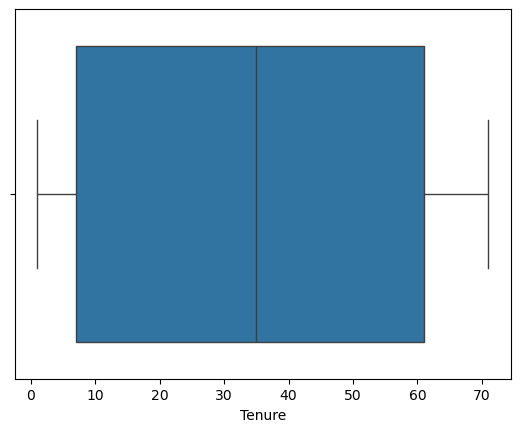

count    10000.00
mean        34.03
std         26.44
min          1.00
25%          7.00
50%         35.00
75%         61.00
max         71.00
Name: Tenure, dtype: float64


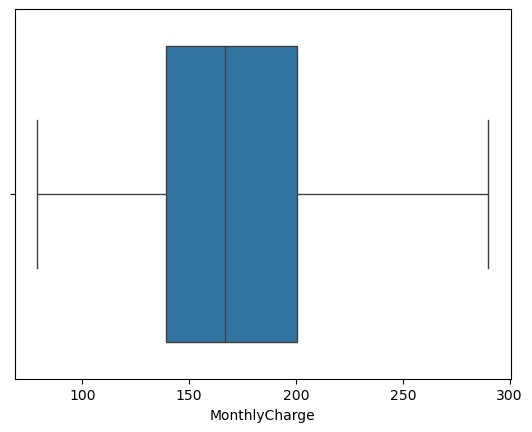

count    10000.00
mean       172.01
std         43.03
min         79.00
25%        139.00
50%        167.00
75%        200.50
max        290.00
Name: MonthlyCharge, dtype: float64


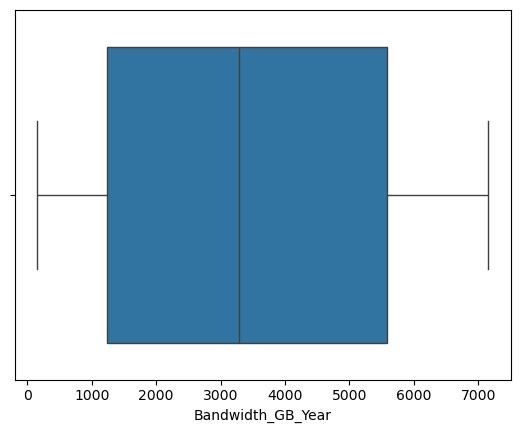

count    10000.00
mean      3391.84
std       2185.29
min        155.00
25%       1236.00
50%       3279.00
75%       5586.00
max       7158.00
Name: Bandwidth_GB_Year, dtype: float64


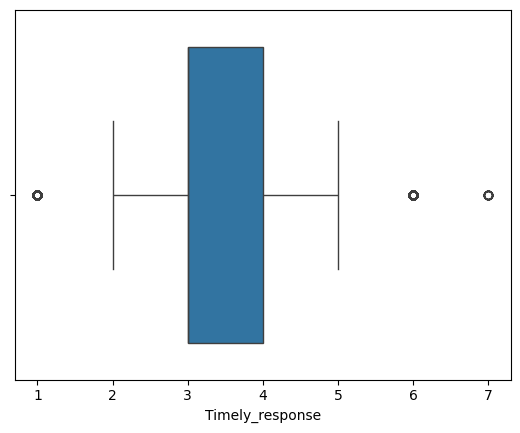

count    10000.00
mean         3.49
std          1.04
min          1.00
25%          3.00
50%          3.00
75%          4.00
max          7.00
Name: Timely_response, dtype: float64


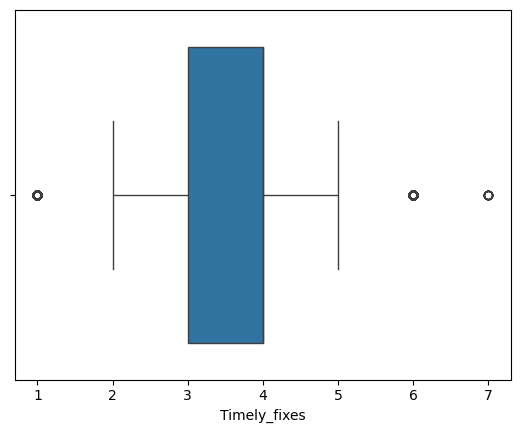

count    10000.00
mean         3.51
std          1.03
min          1.00
25%          3.00
50%          4.00
75%          4.00
max          7.00
Name: Timely_fixes, dtype: float64


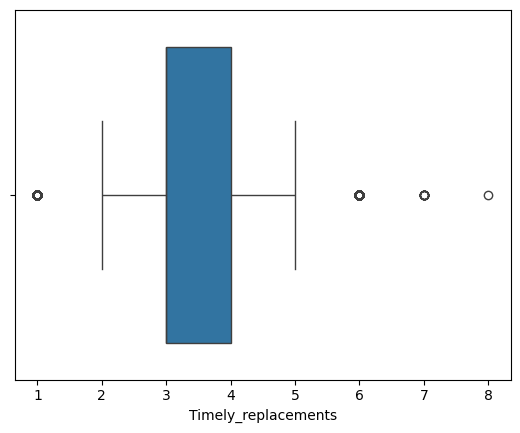

count    10000.00
mean         3.49
std          1.03
min          1.00
25%          3.00
50%          3.00
75%          4.00
max          8.00
Name: Timely_replacements, dtype: float64


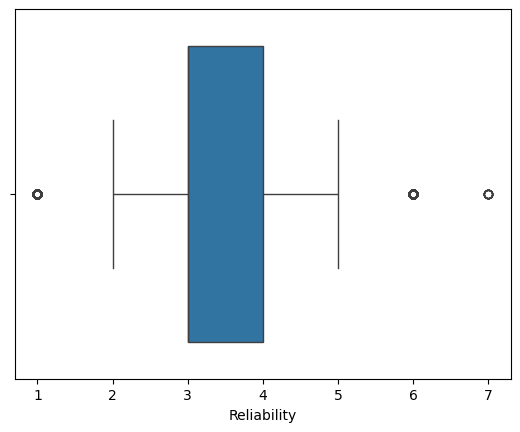

count    10000.00
mean         3.50
std          1.03
min          1.00
25%          3.00
50%          3.00
75%          4.00
max          7.00
Name: Reliability, dtype: float64


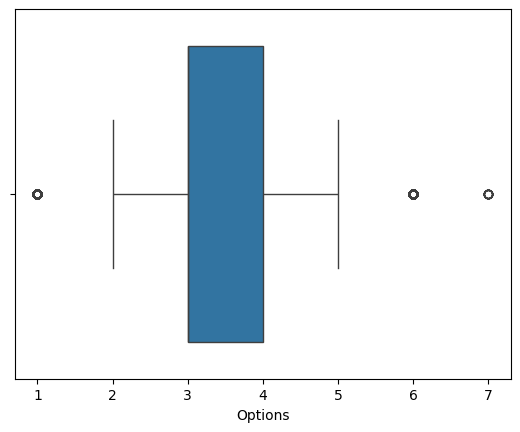

count    10000.00
mean         3.49
std          1.02
min          1.00
25%          3.00
50%          3.00
75%          4.00
max          7.00
Name: Options, dtype: float64


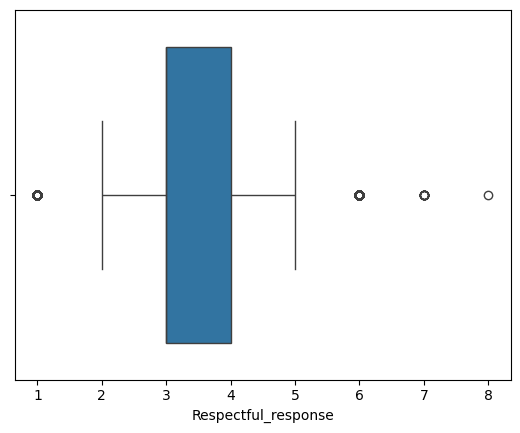

count    10000.00
mean         3.50
std          1.03
min          1.00
25%          3.00
50%          3.00
75%          4.00
max          8.00
Name: Respectful_response, dtype: float64


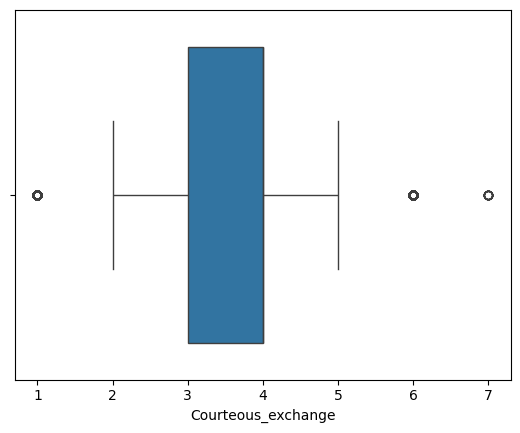

count    10000.00
mean         3.51
std          1.03
min          1.00
25%          3.00
50%          4.00
75%          4.00
max          7.00
Name: Courteous_exchange, dtype: float64


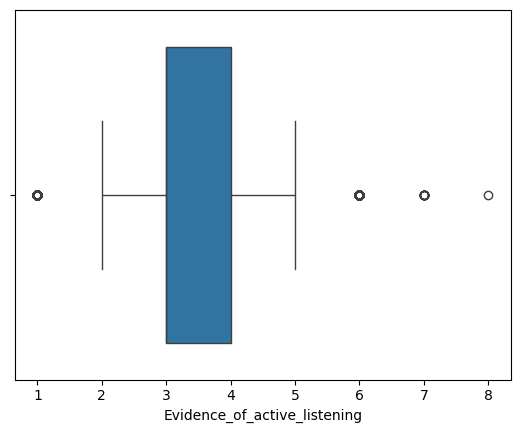

count    10000.00
mean         3.50
std          1.03
min          1.00
25%          3.00
50%          3.00
75%          4.00
max          8.00
Name: Evidence_of_active_listening, dtype: float64


In [45]:
for column in num:
    plt.figure()    
    sns.boxplot(data = file, x = column)
    plt.show()
    print(file[column].describe().round(2).T)
    ;

Using a loop create displot over file dataframe.

C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\M

<Figure size 640x480 with 0 Axes>

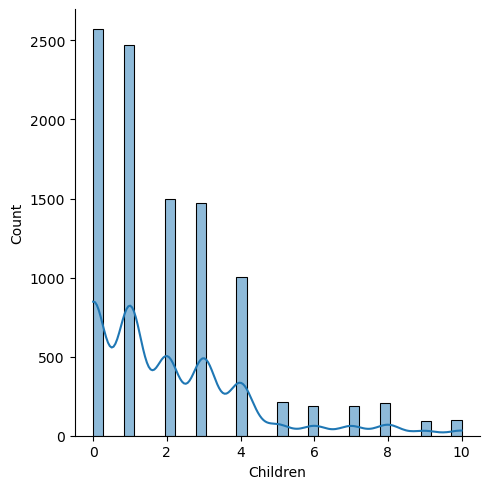

<Figure size 640x480 with 0 Axes>

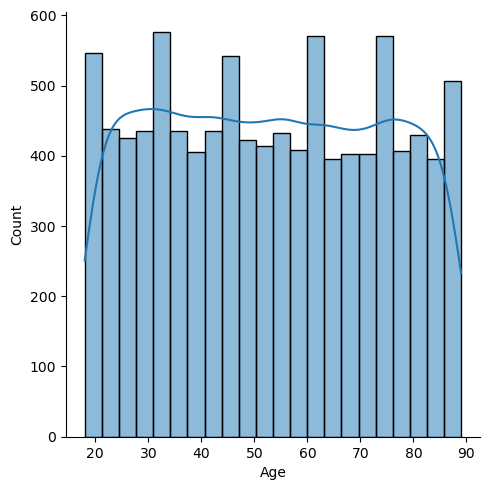

<Figure size 640x480 with 0 Axes>

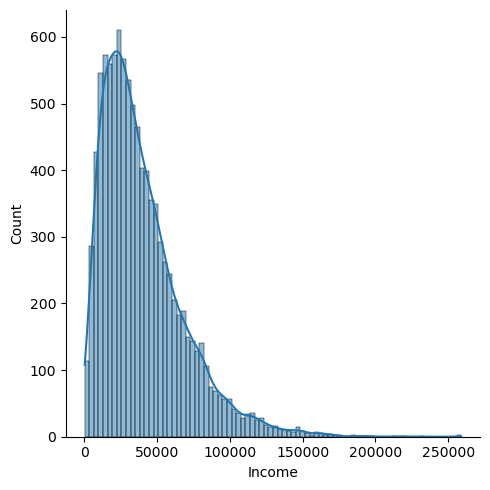

<Figure size 640x480 with 0 Axes>

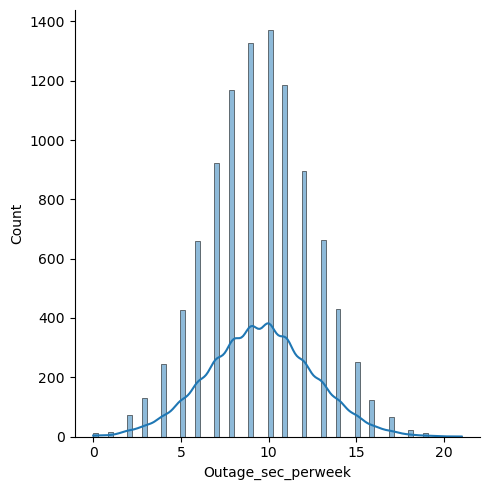

<Figure size 640x480 with 0 Axes>

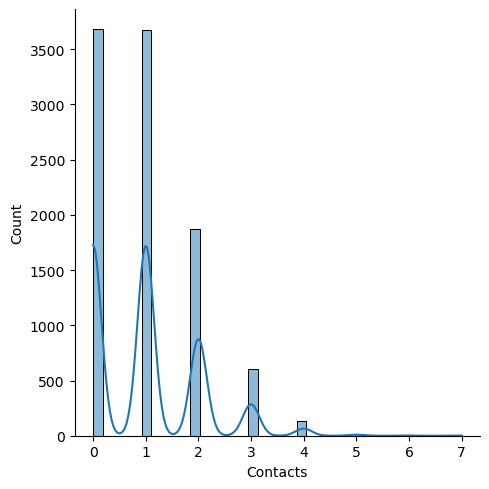

<Figure size 640x480 with 0 Axes>

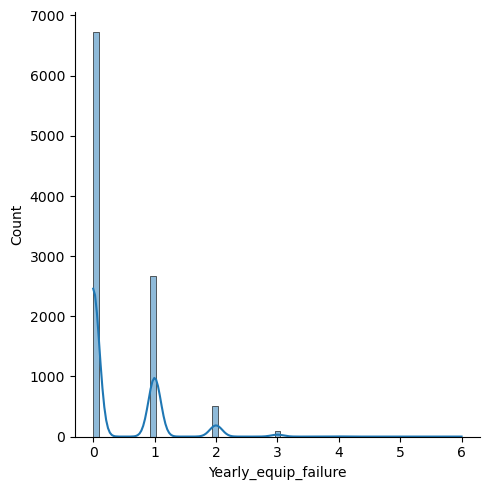

<Figure size 640x480 with 0 Axes>

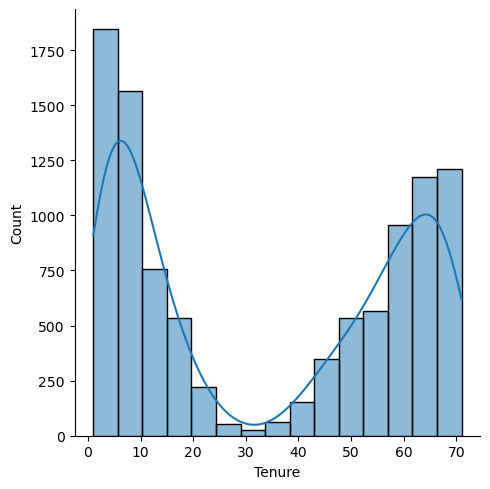

<Figure size 640x480 with 0 Axes>

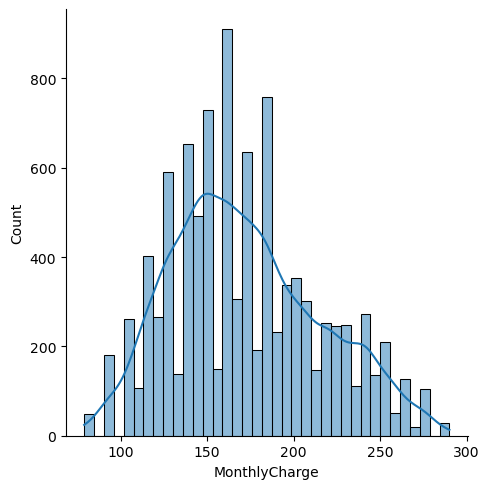

<Figure size 640x480 with 0 Axes>

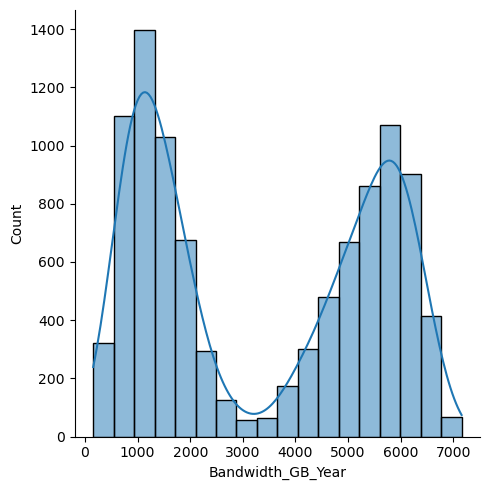

<Figure size 640x480 with 0 Axes>

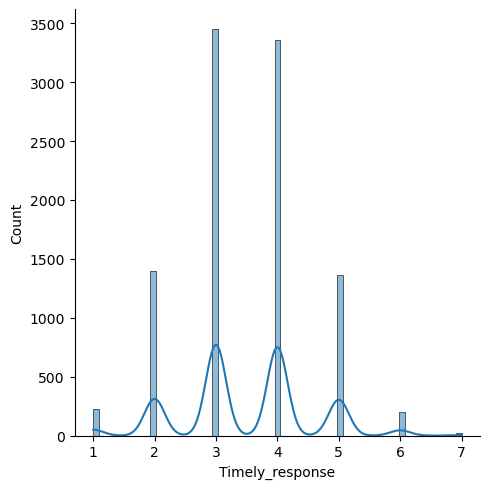

<Figure size 640x480 with 0 Axes>

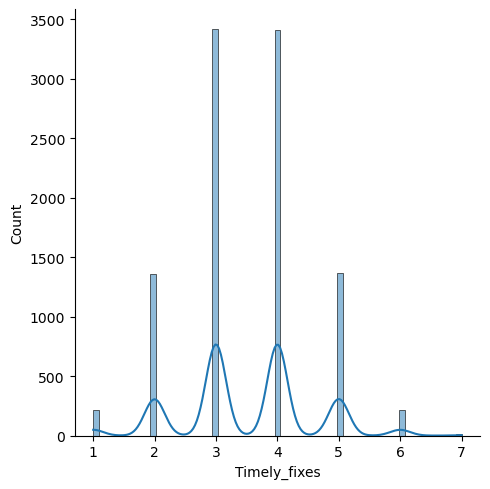

<Figure size 640x480 with 0 Axes>

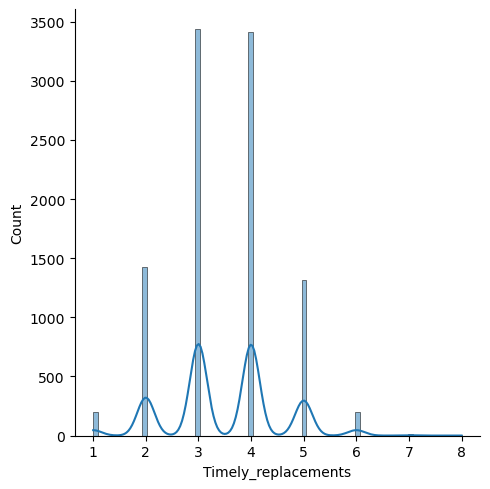

<Figure size 640x480 with 0 Axes>

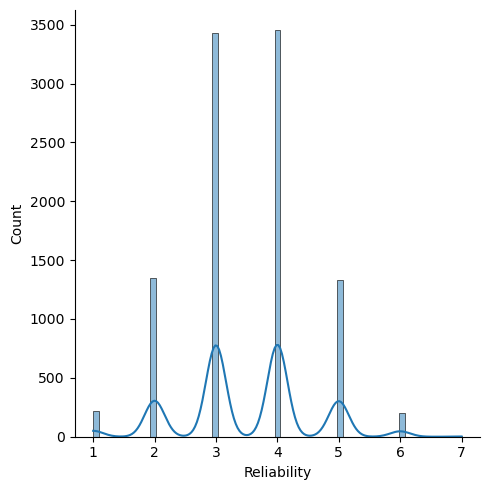

<Figure size 640x480 with 0 Axes>

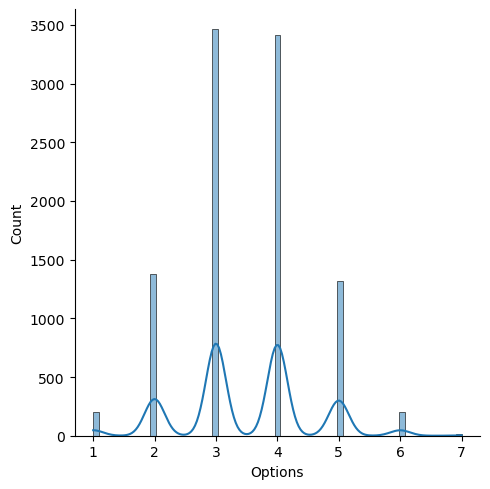

<Figure size 640x480 with 0 Axes>

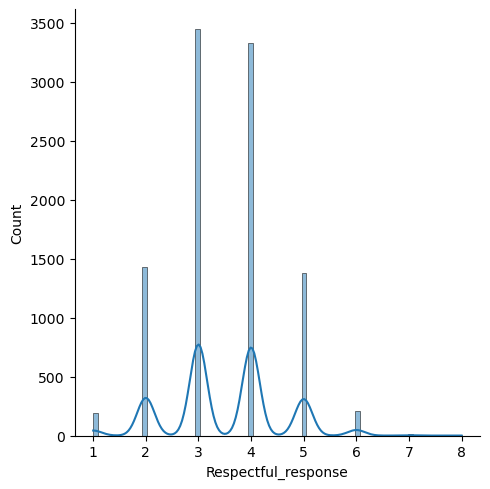

<Figure size 640x480 with 0 Axes>

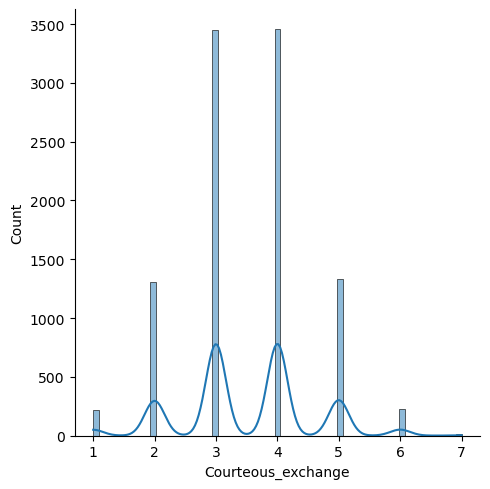

<Figure size 640x480 with 0 Axes>

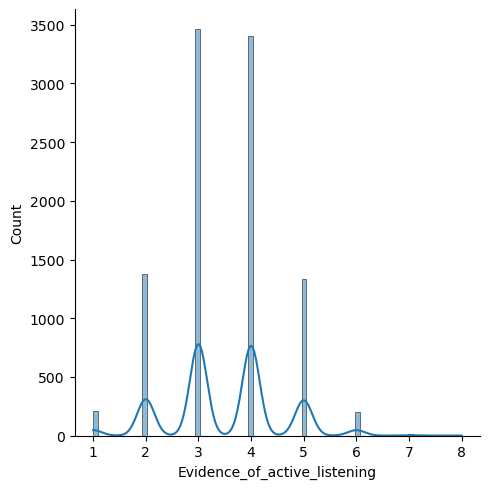

In [46]:
for column in num:
    plt.figure()    
    sns.displot(data = file, x =column, kde = True);

Visualize categories using bar charts

C:\Users\Matth\AppData\Local\Temp\ipykernel_27108\531880696.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout(h_pad=2, w_pad=2)
C:\Users\Matth\AppData\Local\Temp\ipykernel_27108\531880696.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout(h_pad=2, w_pad=2)
C:\Users\Matth\AppData\Local\Temp\ipykernel_27108\531880696.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout(h_pad=2, w_pad=2)
C:\Users\Matth\AppData\Local\Temp\ipykernel_27108\531880696.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout(h_pad=2, w_pad=2)
C:\Users\Matth\AppData\Local\Temp\ipykernel_27108\531880696.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout(h_pad=2, w_pad=2)
C:\Users\Matth\AppData\Local\Temp\ipykernel_27108\531880696.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout(h_pad=2, w_pad=2)
C:\Users\Matth\AppData\Local\Temp\ipykernel_27108\531880696.py:8: User

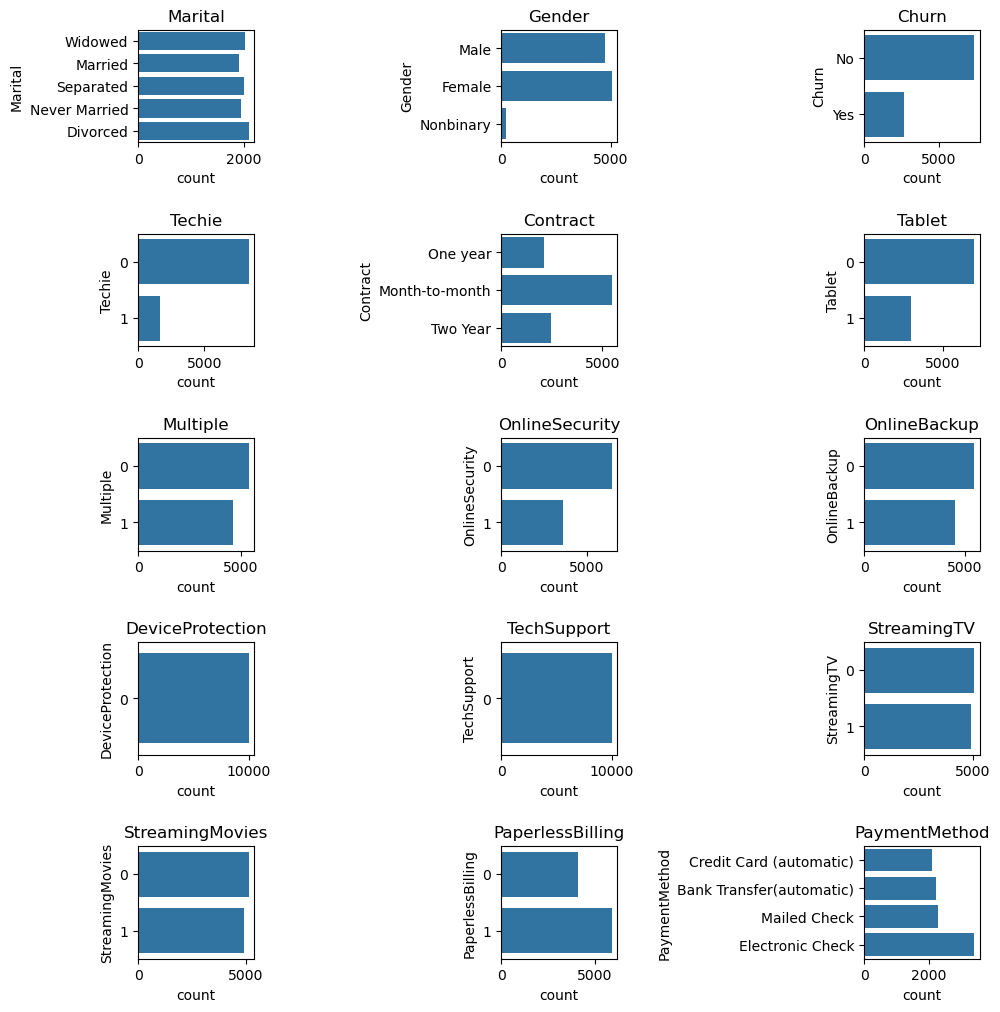

In [47]:
# count plot of categorical data
fig = plt.figure(figsize=(10, 20))

for i, col in enumerate(obj):
    plt.subplot(10, 3, i+1)
    ax = sns.countplot(y=col, data=file)
    plt.title(col)
    fig.tight_layout(h_pad=2, w_pad=2)

plt.savefig('countplot_cat_data.png', facecolor='w')

review correlation properties of numeric values in data set

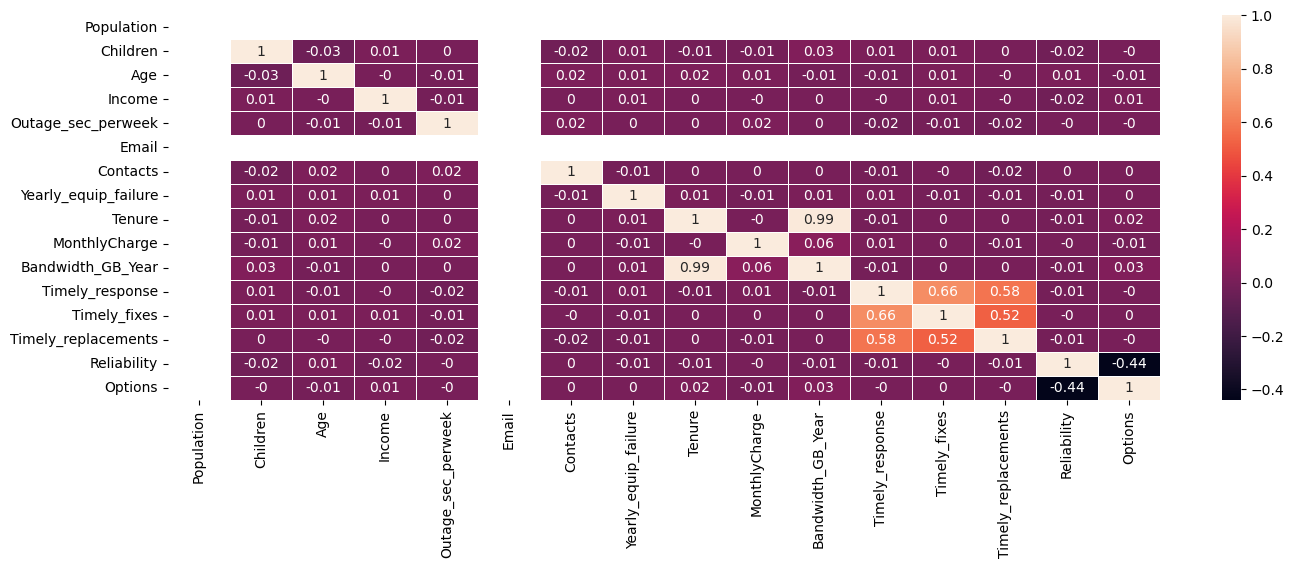

In [48]:
df_num= pd.DataFrame(file, columns= ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timely_response', 'Timely_fixes',
       'Timely_replacements', 'Reliability', 'Options'])

corrMatrix = df_num.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(corrMatrix, linewidths=.5, annot=True)
plt.show()

Review heatmap of categorical objects

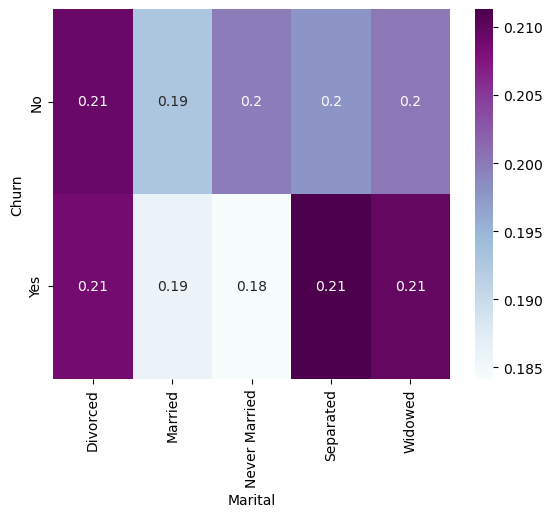

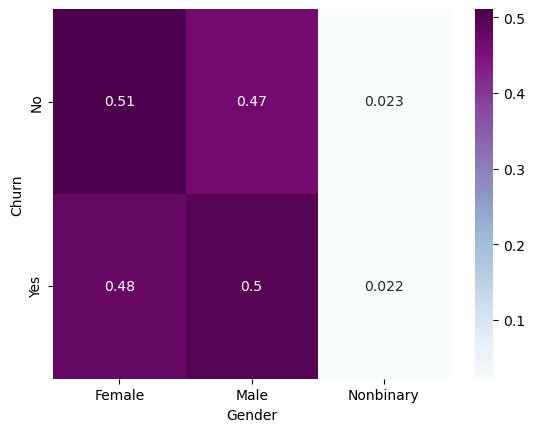

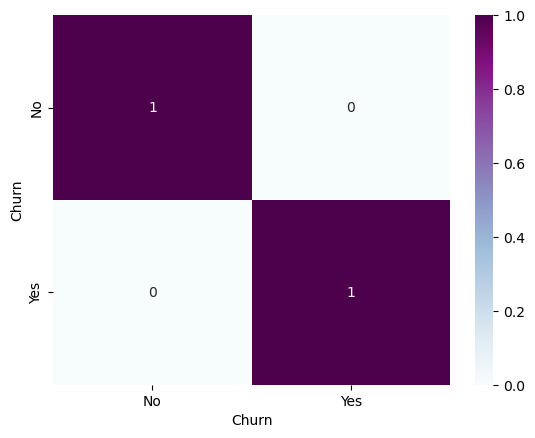

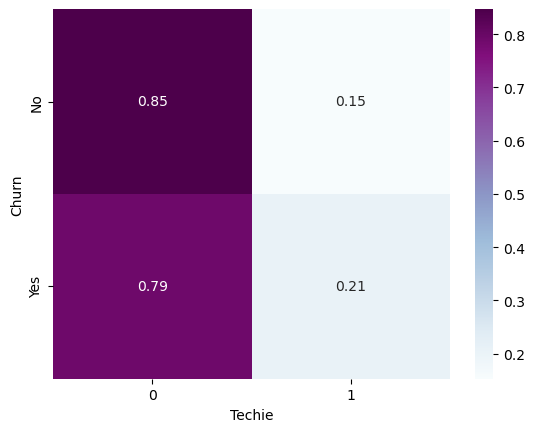

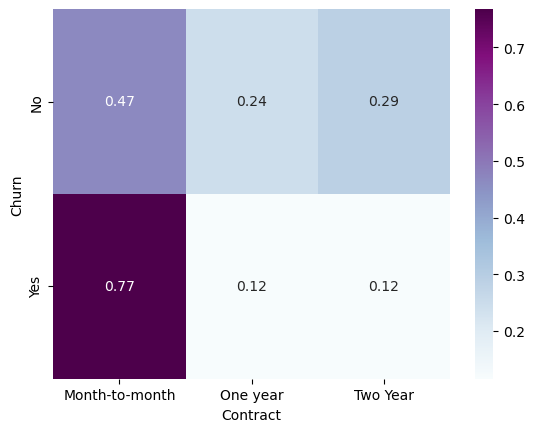

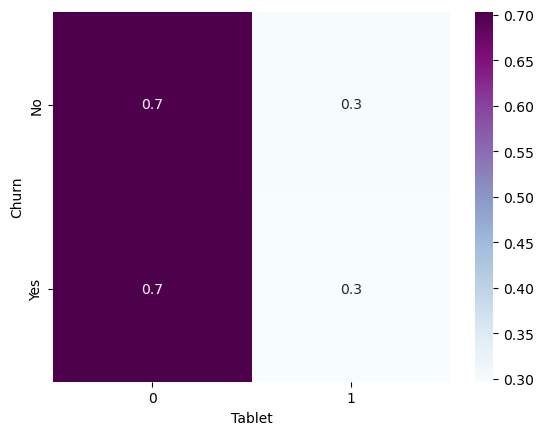

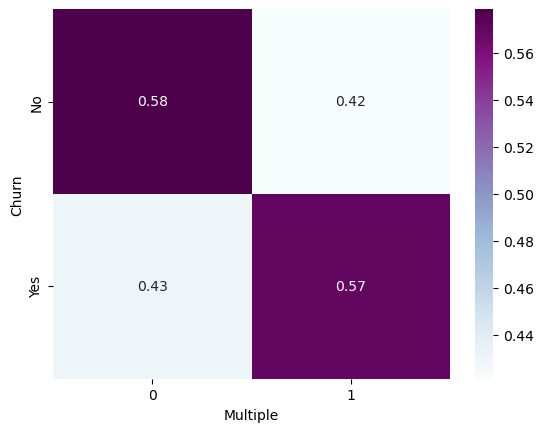

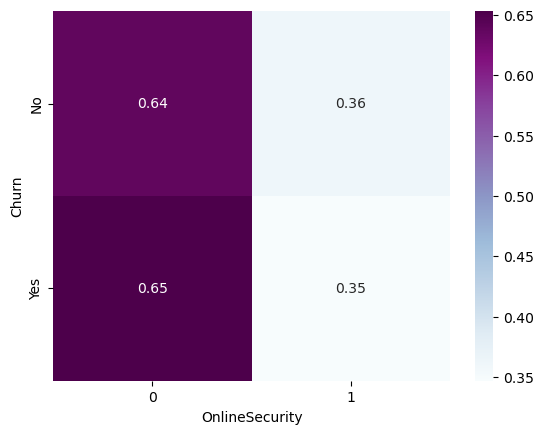

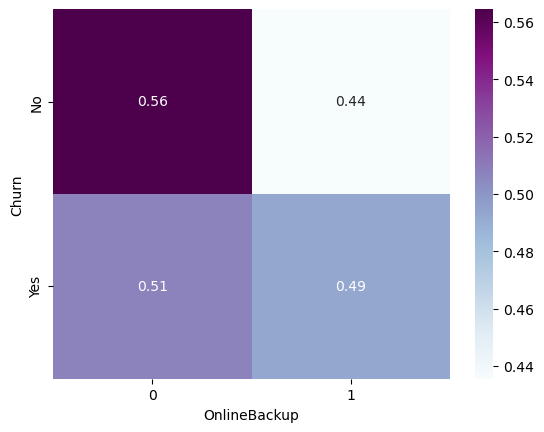

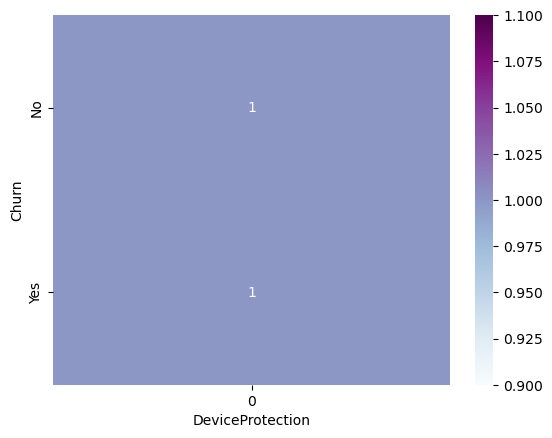

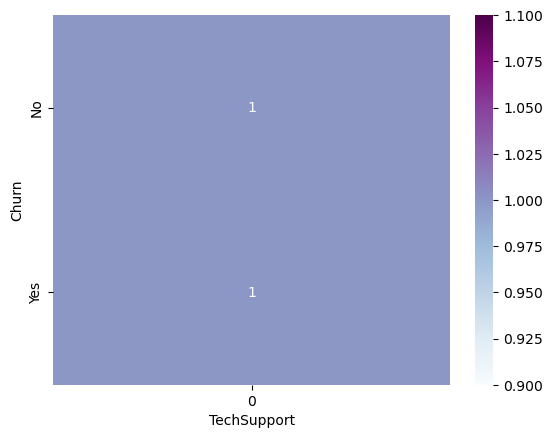

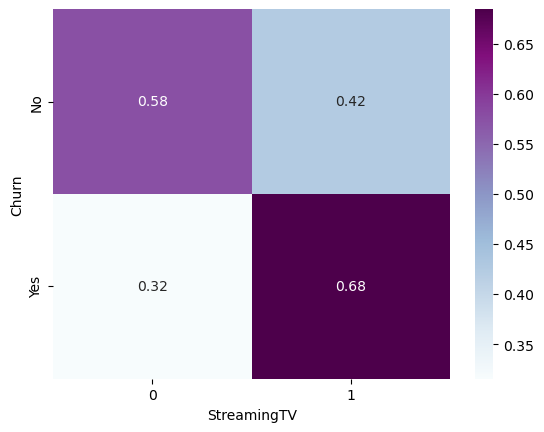

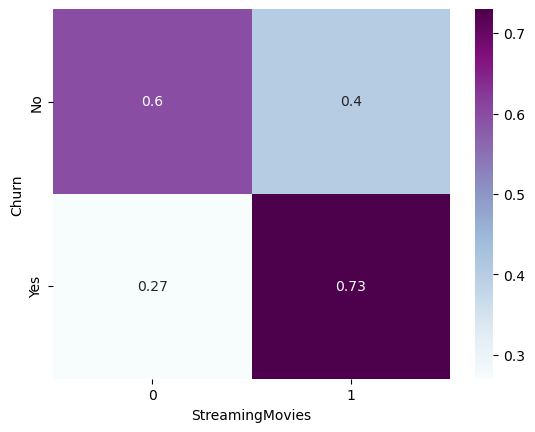

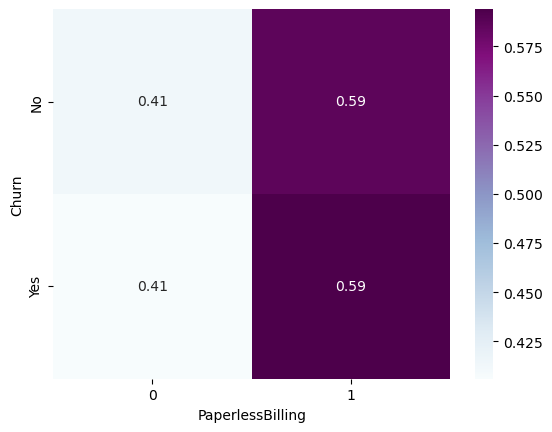

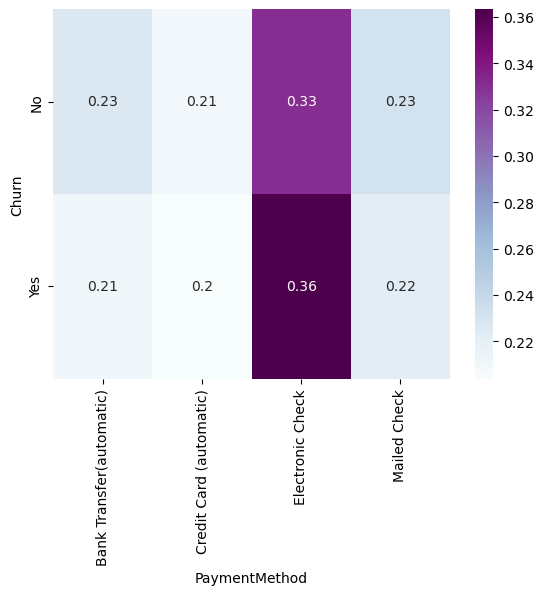

In [49]:
for column in obj:
    cont_pct = pd.crosstab(file['Churn'], file[column], normalize = 'index')
    plt.figure()    
    sns.heatmap(cont_pct, annot = True, cmap ="BuPu" );
    
# reference https://python-bloggers.com/2020/09/how-to-run-chi-square-test-in-python/

Evaluate assumption that Bandwidth and Tenure have a high correlative fit

In [50]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# review assumption of relationship between BGW to Tenure
x = file.Bandwidth_GB_Year
y = file.Tenure
sns.scatterplot(x,y)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

## Univariate
perform univariate analysis over dataset

In [ ]:
def unistats(file):
    #create headers
    output_df = pd.DataFrame(columns =['Count','Missing', 'Unique', 'Dtype', 'Numeric', 'Mode', 'Mean', 'Min',
                                       '25%', 'Median', '75%','Max', 'Std', 'Skew', 'Kurt'])
    
    for col in file:
        if pd.api.types.is_numeric_dtype(file[col]):
            output_df.loc[col] = [file[col].count(),file[col].isnull,file[col].nunique(),file[col].dtype, pd.api.types.is_numeric_dtype(file[col]),
                                 file[col].mode().values[0],file[col].mean(),file[col].min(),file[col].quantile(0.25),file[col].median(),
                                 file[col].quantile(0.75),file[col].max(),file[col].std(),file[col].skew(),file[col].kurt()]
        else:
            output_df.loc[col] = [file[col].count(),file[col].isnull,file[col].nunique(),file[col].dtype, pd.api.types.is_numeric_dtype(file[col]),
                                  '','','','','','','','','','']
    return output_df.sort_values(by=['Numeric','Skew','Unique'], ascending = False)
unistats(file)

## Bivariate
Review Bivariate analysis over data set.

In [ ]:
import warnings
warnings.simplefilter(action="ignore")

def bivstats(file, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
    #Create Empty dataframe to store output
    output_df = pd.DataFrame(columns=['r', 'F', 'X2', 'p-value'])
    
    for col in file:
        if not col == label:
            if file[col].isnull().sum()==0:
                if pd.api.types.is_numeric_dtype(file[col]): # only calculate r, p-value for the numeric 
                    r, p = stats.pearsonr(file[label], file[col])
                    output_df.loc[col] = [round(r,3), np.nan, np.nan, round(p,6)]
            else:
                output_df.loc[col] = [np.nan, np.nan, np.nan, 'nulls']
    return output_df.reindex(output_df.r.abs().sort_values(ascending = False).index)
bivstats(file, 'churn_dum')

In [ ]:
def anova(file, feature, label):
    import pandas as pd
    import numpy as np
    from scipy import stats
    # use the unique() to generate a list of unique values in catigorical column
    groups = file[feature].unique()
    # print(groups)
    file_grouped = file.groupby(feature)
    #print(df_grouped)
    group_labels = []
    for g in groups:
        g_list = file_grouped.get_group(g)
        #print(g_list)
        group_labels.append(g_list[label])
    #print(group_labels)
    return stats.f_oneway(*group_labels)

In [ ]:
def bivstats(file, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
    global output_df
    #Create Empty dataframe to store output
    output_df = pd.DataFrame(columns=['Stat','r(+/1)', 'Effect Size','p-value'])
    
    for col in file:
        if not col == label:
            if file[col].isnull().sum()==0:
                if pd.api.types.is_numeric_dtype(file[col]): # only calculate r, p-value for the numeric 
                    r, p = stats.pearsonr(file[label], file[col])
                    output_df.loc[col] = ['r', np.sign(r), abs(round(r,3)>.4), round(6)>.5]
                else:
                    F, p = anova(file[[col, label]], col, label)
                    output_df.loc[col] =  ['F', '', round(F,3)>.4, round(p,6)>.5]
                    
                    
            else:
                output_df.loc[col] = [np.nan, np.nan, np.nan, np.nan]
                
    return output_df.sort_values(by=['p-value','Effect Size'], ascending = [False, False])
bivstats(file, 'churn_dum')

# C5 PREPARED DATA SET
The submission provides a copy of the fully prepared data set.

In [ ]:
for column in num:
    plt.figure()    
    sns.regplot(x=file['churn_dum'], y = column, data=file, logistic=True, ci=None);

In [ ]:
file.to_csv("C:\\Users\\msmorris\\Desktop\\pred.csv")

## D1 INITIAL MODEL
The submission provides an accurate initial logistic regression model from all predictors identified in Part C2. 

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# initial model
y = file['churn_dum']
X = file[['Techie', 'Multiple', 'StreamingTV', 'StreamingMovies','PaperlessBilling', 
'Children', 'Income', 'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure', 'Timely_response', 
'Timely_fixes', 'Timely_replacements', 'Reliability', 'Options', 'Respectful_response', 'Courteous_exchange', 
'Evidence_of_active_listening','Intercept']]
X = sm.add_constant(X)
# X = (X - X.min()) / (X.max() - X.min()) 
# split X and y into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
model1 = sm.Logit(y, X)
result = model1.fit()
result.summary()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True)

In [ ]:
import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# D2 JUSTIFICATION OF MODEL REDUCTION

A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random).

What is referred to with the null hypothesis is the attempt to prove out how often the model or predicton would fail or how often the prediction would happen by chance. Using the standard P-value less then .05 reduces the likelyhood that the model is accurate by chance. The lower the p value the more certain we can be that the accurate predictions are not by chance.  The Hypthosis in this case would be that the features are linked to customers Churning. When reviewing the p values and applying the standard of  having a P value of  < .05 leads to rejecting features that do not meet the criteria and the remaining are;'Multiple', 'Techie','StreamingTV', and 'StreamingMovies'.  

# D3 REDUCED MULTIPLE REGRESSION MODEL
The submission provides a reduced multiple regression model that includes both categorical and continuous variables, and the reduced model is in alignment with the justification from part D2.

In [51]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# initial model
y = file['churn_dum']
X = file[['Multiple', 'Techie','StreamingTV', 'StreamingMovies', 'Intercept']]
# y = y.to_numpy()
# X = X.to_numpy()
X = sm.add_constant(X)
# X = (X - X.min()) / (X.max() - X.min()) 
# split X and y into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
model2 = sm.Logit(y, X)
result = model2.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.492539
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              churn_dum   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Wed, 28 Feb 2024   Pseudo R-squ.:                  0.1482
Time:                        11:39:17   Log-Likelihood:                -4925.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Multiple            0.6985      0.050     13.950      0.000       0.600       0.797
Techie              0.4654      0.064      7.275      0.000       0.340       0.591
StreamingTV         1.2357      0.052     23.937      0.000       1.135       1.337
StreamingMovies     1.5319      0.053     29.062      0.000       1.429       1.635
Intercept          -3.0121      0.065    -46.145      0.000      -3.140      -2.884
===================================================================================
"""

<Axes: >

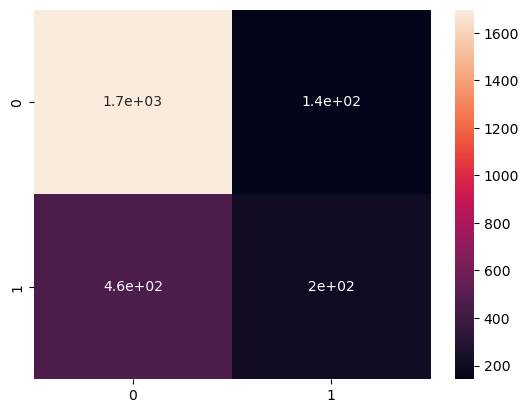

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1840
           1       0.59      0.31      0.40       660

    accuracy                           0.76      2500
   macro avg       0.69      0.62      0.63      2500
weighted avg       0.74      0.76      0.73      2500



# NEXT E1 MODEL COMPARISION
The submission accurately explains the data analysis process by comparing the initial and reduced multiple regression models, including all of the given elements. 


Model 1
1. Precision: Percentage of correct positive predictions relative to total positive predictions.
Precision: Out of all the Customers that the model predicted would Churn, only 0% actually did.


2. Recall: Percentage of correct positive predictions relative to total actual positives.
Recall: The model predicted 0%  Churn accuracy for 36% of the Customers.

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.
The value is 0 and not close to 1. The model does a poor job of predicting whether or not customers will Churn.



Model 2
1. Precision: Percentage of correct positive predictions relative to total positive predictions.
Precision: Out of all the Customers that the model predicted would Churn, 59% actually did out 36% of the customers.


2. Recall: Percentage of correct positive predictions relative to total actual positives.
Recall: The model predicted 31%  Churn accuracy for 36% of the Customers.

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.
The  F1 score is .40 and better than the first model. 





# F1 RESULTS

Model 1
Pseudo R-squ.: 	0.1498

Model 2
Pseudo R-squ.: 	0.1482
This displays a poor fit between the models. 




Limitations of Logistic Regresssion
- Logistic regresssion has a disadvantage of not being able to identify complex relationships which is better suited for Neural Networks. This will also only work with discrete values excluding continuous data that could be insightful.


The only Coeffiecents a significant  P value were; 'Multiple', 'Techie','StreamingTV', 'StreamingMovies'. 
Using only these did increase the models scores with precision, recall, and f1-score but the overall fit based on the Psudeo R-square indicates a decrease in fit. 

Discussion of the practical significance of the model.
Based on the Pseudo R-squ values,the precision, recall and F1 score values and Coef review, both models seem to be lacking significance. However, using just these results for recommendations of actions that can be taken by the company effort should be allocated to StreamingTV and Movie to Increase Customer loyalty and reduce Churn.


Limitations of the analysis.
Logistic regression is used for discrete and not continuous, there is also not a linear relationship between dependent and independent variables. The dataset lacks dates or other elements that would be useful in this analysis. There are also opportunities to explore in binning and breaking apart continuous data or other categorical data to explore output genererated such as Marital status or Income. 




#  Regression equation and Review of Coef
"In simple linear regression, the predicted value of the dependent variable is given by the equation = b0 + b1x. The values of b0 and b1 are calculated from the data so that the line = b0 + b1X minimizes the total sum of squared errors (error is the difference between the predicted value and the actual value of y)"

<cite>Jeff Sauro, James R. Lewis, in Quantifying the User Experience (Second Edition), 2016 
</cite>

In [54]:
# review coefficients from classifier
classifier.coef_[0]

array([ 6.77481847e-01,  5.01801868e-01,  1.21780327e+00,  1.54139179e+00,
       -9.46053326e-06])

In [55]:
# load coefficents and review 
coef = [i for i in classifier.coef_[0]]
coef

[0.6774818465583458,
 0.501801867946611,
 1.2178032671318006,
 1.5413917922426315,
 -9.460533264444383e-06]

In [56]:
# Aggregate into tuple and review coef with X_train

coef_dict = dict(zip(list(X_train.columns), coef))
coef_dict

{'Multiple': 0.6774818465583458,
 'Techie': 0.501801867946611,
 'StreamingTV': 1.2178032671318006,
 'StreamingMovies': 1.5413917922426315,
 'Intercept': -9.460533264444383e-06}

#### Regression equation reduced model

y = -9.46053329475545e-06 + 0.677481846558347(Multiple) + 0.5018018679466106(Techie)+ 1.2178032671318015(StreamingTV) + 1.541391792242631(StreamingMovies)

Interpretation of coefficients

For each unit iteration of:
Multiple will increase churn by 0.67748,  
Techie will increase churn by  0.5018,
StreamingTV will increase churn by 1.2178,
StreamingMovies will increase churn by 1.5413



Out of the 17 Coef 8 have negative relationships and 4 are significant based on a p value less than .05.
Of those that qualify the values are positive suggesting they
People that ranked Yes in the following categories. 
Using the Coef and odds ratio I was able to determine. 
- 'Techie' are 1.59 times more likely to churn
- 'Multiple' are 2.06 times more likely to churn
- 'StreamingTV' 3.44 times more likely to churn
- 'StreamingMovies' 4.63 times more likely to churn
- 'PaperlessBilling', 1.06 times more likely to churn
- 'Children' .99 times more likely to churn
- 'Income' 1.00 times more likely to churn
- 'Outage_sec_perweek' .99 times more likely to churn
- 'Contacts' 1.02 times more likely to churn
- 'Yearly_equip_failure' .93 times more likely to churn
- 'Timely_response', 1.00 times more likely to churn
- 'Timely_fixes'.96 times more likely to churn
- 'Timely_replacements' .99 times more likely to churn
- 'Reliability' .97 times more likely to churn 
- 'Options' .96 times more likely to churn
- 'Respectful_response' 1.01 times more likely to churn
- 'Courteous_exchange' .98 times more likely to churn 
- 'Evidence_of_active_listening' 1.02 times more likely to churn

The Coefs that have p values that meet the criteria of .05 are 'Multiple', 'Techie','StreamingTV', and 'StreamingMovies'
which also have the highest likelyhood of Churn making these good candidates to review in the reduced model. 

# F2 RECOMMENDATION
Based on the results of these results the predictors for churn would indicate focused efforts on StreamingTV and StreamingMovie as incentives to reduce churn. 